In [1]:
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 激活函数
def relu(x):
    return (abs(x)+x)/2

In [3]:
def gcn_layer(A_h, D_h, X, W):
    return D_h**(-1) * A_h * X * W

In [4]:
# 图网络G可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges)
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.4)
    plt.show()

In [5]:
def plot_node(nodes, output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
#         value = G.nodes[node_name]
#         print(value)
        plt.scatter(np.array(output)[i, 0], np.array(output)[i, 1], label=str(i), color='blue', alpha=0.5, s=250)
        plt.text(np.array(output)[i, 0], np.array(output)[i,1], i, horizontalalignment='center', verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()

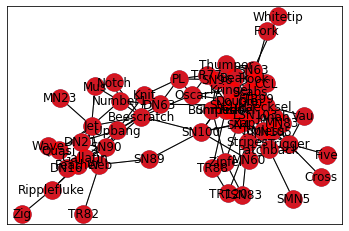

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [6]:
G = nx.read_gml('dolphins.gml')
plot_graph(G)
print(list(G.nodes()))

In [7]:
order = sorted(list(G.nodes()))
print(order)
# 邻接矩阵
A = to_numpy_matrix(G, nodelist=order)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [8]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)

A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [9]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)

D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]
D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [10]:
# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))

In [11]:
# 叠加GCN层
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

In [12]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)

feature_representations=
 {'Beak': array([0.06881819, 0.2418186 ]), 'Beescratch': array([-0.05809943,  0.07685205]), 'Bumper': array([0.00572508, 0.49608945]), 'CCL': array([-0.12209256, -0.01899833]), 'Cross': array([ 0.39511797, -0.47647669]), 'DN16': array([-0.14246229, -0.72504737]), 'DN21': array([-0.19167678, -0.76498304]), 'DN63': array([-0.24726603, -0.40761171]), 'Double': array([-0.02775467,  0.13460011]), 'Feather': array([-0.10445401, -0.40765277]), 'Fish': array([0.06890846, 0.5130196 ]), 'Five': array([ 0.60901934, -0.09135995]), 'Fork': array([-0.20092274, -0.74371174]), 'Gallatin': array([-0.13064157, -0.43266032]), 'Grin': array([ 0.0295053 , -0.14950247]), 'Haecksel': array([ 0.11767669, -0.06674595]), 'Hook': array([ 0.07361842, -0.10292261]), 'Jet': array([-0.05133796, -0.6800065 ]), 'Jonah': array([0.2100843 , 0.14392542]), 'Knit': array([-0.27788925, -0.5539715 ]), 'Kringel': array([0.08353268, 0.14744101]), 'MN105': array([0.19862622, 0.14529743]), 'MN23': array(

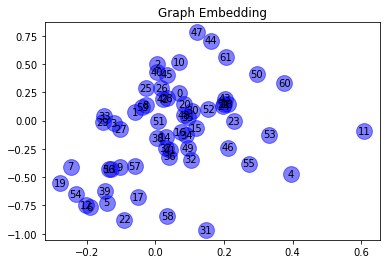

In [13]:
plot_node(nodes, output, 'Graph Embedding')